In [112]:
import pandas as pd

In [113]:
df_train = pd.read_csv('../input/bikes-rent/bikes_rent.csv')

In [114]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


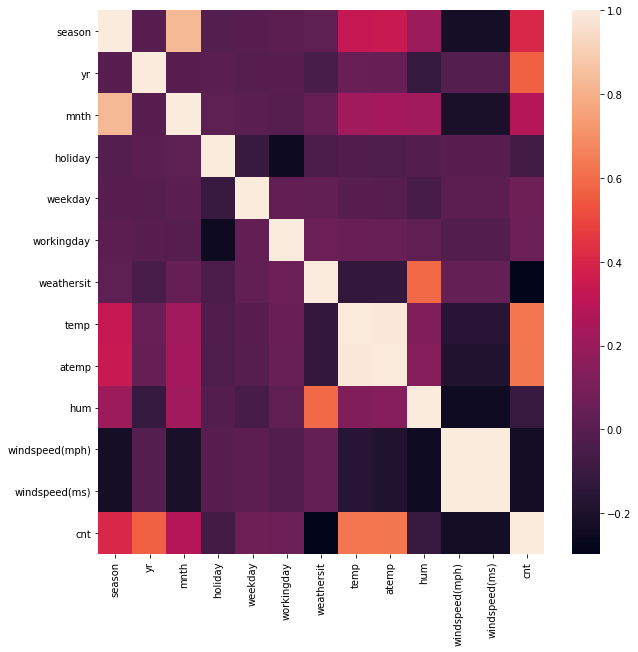

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sns.heatmap(df_train.corr(), ax=ax)

In [121]:
categ_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']
real_columns = ['weathersit', 'temp', 'hum', 'windspeed(mph)']

X_cat = df_train[categ_columns]
X_real = df_train[real_columns]

SyntaxError: EOL while scanning string literal (<ipython-input-121-060d618a1ac0>, line 2)

In [122]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(X_cat)
X_cat_one_hoted = one_hot_encoder.transform(X_cat).toarray()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_real)
X_real_scaled = scaler.transform(X_real)

import numpy as np

data_train = np.hstack((X_real_scaled, X_cat_one_hoted))
target = df_train['cnt']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train, target, test_size=0.3)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("linear mae:", mean_absolute_error(lr_model.predict(X_test), y_test))

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print("rf mae:", mean_absolute_error(rf_model.predict(X_test), y_test))

linear mae: 609.5012559631122
rf mae: 553.8101363636363
